In [1]:
import pandas as pd
import yfinance as yf

msft = yf.Ticker("MSFT")
hist = msft.history(period = "100d")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-12,233.470882,235.276725,232.692680,235.206879,22653700,0.0,0
2021-03-15,234.418707,234.648172,231.275954,234.269043,26034900,0.0,0
2021-03-16,235.735655,239.506946,235.396442,237.162369,28092200,0.0,0
2021-03-17,235.605963,238.000443,232.692691,236.493912,29562100,0.0,0
2021-03-18,232.024234,233.650484,229.799376,230.188477,34833000,0.0,0
...,...,...,...,...,...,...,...
2021-07-28,288.989990,290.149994,283.829987,286.220001,33566900,0.0,0
2021-07-29,286.239990,288.619995,286.079987,286.500000,18168300,0.0,0
2021-07-30,285.170013,286.660004,283.910004,284.910004,20940900,0.0,0


In [2]:
hist['MA'] = hist['Close'].rolling(window = 20).mean()
hist['EMA'] = pd.Series.ewm(hist['Close'], span = 20).mean()

hist = hist.dropna(subset = ['MA', 'EMA'])
hist = hist.reset_index()
hist = hist.filter(['Close', 'MA', 'EMA'])
hist


,Close,MA,EMA
0,255.260590,238.717279,242.329598
1,255.320450,239.722958,243.739125
2,257.894501,240.904230,245.254901
3,255.001175,241.796171,246.286329
4,258.902161,242.916583,247.607446
...,...,...,...
76,286.220001,280.552003,279.877991
77,286.500000,281.332004,280.508696
78,284.910004,281.997504,280.927892
79,284.820007,282.356004,281.298588


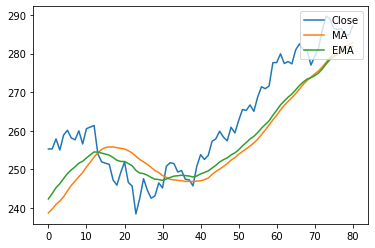

In [3]:
import matplotlib.pyplot as plt

for item in hist.columns:
  plt.plot(hist.index, hist[item], label = item)

plt.legend(loc = 'upper right')
plt.show()